In [153]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [185]:
with open('salaryData.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# columns not used in model
columns = ['timestamp', 'otherdetails', 'dmaid', 'rowNumber', 
           'yearsatcompany', 'company', 'gender', 'cityid',
           'level', 'tag', 'bonus','stockgrantvalue'] # TODO: consider adding these to model
df.drop(columns, inplace=True, axis=1)

In [186]:
df.reset_index(drop=True, inplace=True)
df['location'] = df['location'].str.replace(" ", "")
# print(dataset['title'][0].replace(" ", "_"))
df = df.replace(' ', '_', regex=True)

In [187]:
df = df[df['totalyearlycompensation'].apply(lambda x: str(x).isdigit())]
df['totalyearlycompensation'] = pd.to_numeric(df['totalyearlycompensation'], downcast='integer', errors='coerce')
df['yearsofexperience'] = pd.to_numeric(df['yearsofexperience'])

cols = ['totalyearlycompensation'] 

In [188]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [189]:
df = df[~df.groupby('yearsofexperience')['totalyearlycompensation'].apply(is_outlier)]

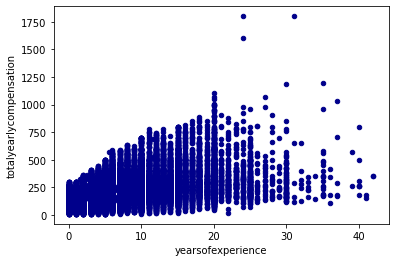

In [190]:
ax1 = df.plot.scatter(x='yearsofexperience',
                      y='totalyearlycompensation',
                      c='DarkBlue')
ax1

In [191]:
# filter out cities with less than 100 datapoints
df_top_cities = df.groupby('location').filter(lambda x: len(x) >= 50)

In [192]:
# multivariate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import BayesianRidge 

# independent and dependent variables
features = ['yearsofexperience', 'location', 'title']
target = 'totalyearlycompensation'

X = df_top_cities[features]
Y = df_top_cities[target]


In [193]:
X = pd.get_dummies(data=X, drop_first=True)

# 80/20 split- 20% training data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [194]:
# define model I am using
model = LinearRegression(normalize = True)

In [195]:
# training process
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [196]:
from joblib import dump
dump(model, filename="salary_predict2.joblib")

['salary_predict2.joblib']

In [197]:
# get model performance
print(list(X_train.columns))
def scores_(model, X, Y):
    y_predict = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
    r2 = r2_score(Y, y_predict)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
print("The model performance of training set")
scores_(model,X_train,Y_train)
print("--------------------------------------")
print("The model performance of testing set")
scores_(model,X_test,Y_test)

['yearsofexperience', 'location_Arlington,VA', 'location_Atlanta,GA', 'location_Austin,TX', 'location_Bangalore,KA,India', 'location_Bellevue,WA', 'location_Bengaluru,KA,India', 'location_Berlin,BE,Germany', 'location_Boston,MA', 'location_Boulder,CO', 'location_Cambridge,MA', 'location_Chicago,IL', 'location_Cupertino,CA', 'location_Dallas,TX', 'location_Denver,CO', 'location_Dublin,DN,Ireland', 'location_Folsom,CA', 'location_FosterCity,CA', 'location_Herndon,VA', 'location_Hillsboro,OR', 'location_Houston,TX', 'location_Hyderabad,TS,India', 'location_Irvine,CA', 'location_JerseyCity,NJ', 'location_Kirkland,WA', 'location_London,EN,UnitedKingdom', 'location_LosAngeles,CA', 'location_LosGatos,CA', 'location_Madison,WI', 'location_MenloPark,CA', 'location_Milpitas,CA', 'location_Minneapolis,MN', 'location_Montreal,QC,Canada', 'location_Moscow,MC,Russia', 'location_MountainView,CA', 'location_NewYork,NY', 'location_Ottawa,ON,Canada', 'location_PaloAlto,CA', 'location_Philadelphia,PA', '

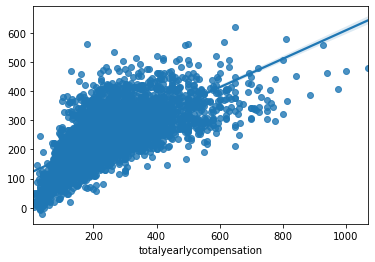

In [198]:
import seaborn as sns

predictions = model.predict(X_test)
sns.regplot(Y_test,predictions)

In [199]:
model.predict([[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([94.36201723])